In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Imports

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DataScienceProject')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Packages.QC import QC
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x_tr = pd.read_csv('Model ready data/x_train.csv')
x_tr_nm = pd.read_csv('Model ready data/x_train_norm.csv')
x_te = pd.read_csv('Model ready data/x_test.csv')
x_te_nm = pd.read_csv('Model ready data/x_test_norm.csv')
y_tr = pd.read_csv('Model ready data/y_train.csv')
y_te = pd.read_csv('Model ready data/y_test.csv')

#Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

###Without transformation

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_tr,y_tr)
print(f'Coefficiets without transformed training data :\n {list(zip(x_tr.columns,lin_reg.coef_.tolist()[0]))}\nBias / Intercept = {lin_reg.intercept_}')

Coefficiets without transformed training data :
 [(' Cushing, OK WTI Crude oil Spot Price FOB (Dollars per Barrel) ', 0.017502729606208675), (' Europe Brent Spot Price FOB (Dollars per Barrel) ', 0.010081874940562134), (' U.S. Field Production of Crude Oil (Thousand Barrels) ', -4.1421025511866744e-08), (' Alaska Field Production of Crude Oil (Thousand Barrels) ', -1.3157210300967365e-06), (' U.S. Imports of Crude Oil (Thousand Barrels) ', 4.81028658661474e-07), (' U.S. Percent of Crude Oil Stocks Held in SPR (Percent) ', -0.030438789949787246), (' U.S. Percent of Total Petroleum Stocks Held in SPR (Percent) ', 0.013784801873997209)]
Bias / Intercept = [1.4282748]


In [ ]:
ylr_tr_pred = lin_reg.predict(x_tr)
ylr_te_pred = lin_reg.predict(x_te)
print(f'Mean squared error without transformed data\nTrain = {mean_squared_error(y_tr,ylr_tr_pred)*100}%\t\tTest = {mean_squared_error(y_te,ylr_te_pred)*100}%')

Mean squared error without transformed data
Train = 1.3856933287936959%		Test = 1.3539917984432766%


In [ ]:
tr_adj_r2=1-(1-lin_reg.score(x_tr,y_tr))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1)
te_adj_r2=1-(1-lin_reg.score(x_te,y_te))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1)
print(f'R-2 = {lin_reg.score(x_te,y_te)*100}%\nAdjusted R-2 = {te_adj_r2*100}%')

R-2 = 97.81357344162683%
Adjusted R-2 = 97.61983944278364%


###With min-max scaler

In [ ]:
norm_lin_reg = LinearRegression()
norm_lin_reg.fit(x_tr_nm,y_tr)
print(f'Coefficiets with normalised training data :\n {list(zip(x_tr.columns,norm_lin_reg.coef_.tolist()[0]))}\nBias / Intercept = {norm_lin_reg.intercept_}')

Coefficiets with normalised training data :
 [(' Cushing, OK WTI Crude oil Spot Price FOB (Dollars per Barrel) ', 2.140408803542702), (' Europe Brent Spot Price FOB (Dollars per Barrel) ', 1.2345255864722682), (' U.S. Field Production of Crude Oil (Thousand Barrels) ', -0.010537954166479013), (' Alaska Field Production of Crude Oil (Thousand Barrels) ', -0.06811356200707264), (' U.S. Imports of Crude Oil (Thousand Barrels) ', 0.10348850562463041), (' U.S. Percent of Crude Oil Stocks Held in SPR (Percent) ', -0.5996441620108095), (' U.S. Percent of Total Petroleum Stocks Held in SPR (Percent) ', 0.20677202810995748)]
Bias / Intercept = [0.55244521]


In [ ]:
ylrnm_tr_pred = norm_lin_reg.predict(x_tr_nm)
ylrnm_te_pred = norm_lin_reg.predict(x_te_nm)
print(f'Mean squared error with normalized data\nTrain = {mean_squared_error(y_tr,ylrnm_tr_pred)*100}%\t\tTest = {mean_squared_error(y_te,ylrnm_te_pred)*100}%')

Mean squared error with normalized data
Train = 1.3856933287936963%		Test = 1.3539917984429322%


In [ ]:
ntr_adj_r2=1-(1-norm_lin_reg.score(x_tr_nm,y_tr))*(len(y_tr)-1)/(len(y_tr)-x_tr.shape[1]-1)
nte_adj_r2=1-(1-norm_lin_reg.score(x_te_nm,y_te))*(len(y_te)-1)/(len(y_te)-x_te.shape[1]-1)
print(f'Test R-2 = {norm_lin_reg.score(x_te_nm,y_te)*100}%\nTest Adjusted R-2 = {nte_adj_r2*100}%')

Test R-2 = 97.81357344162738%
Test Adjusted R-2 = 97.61983944278425%


##Actual vs predicted prices

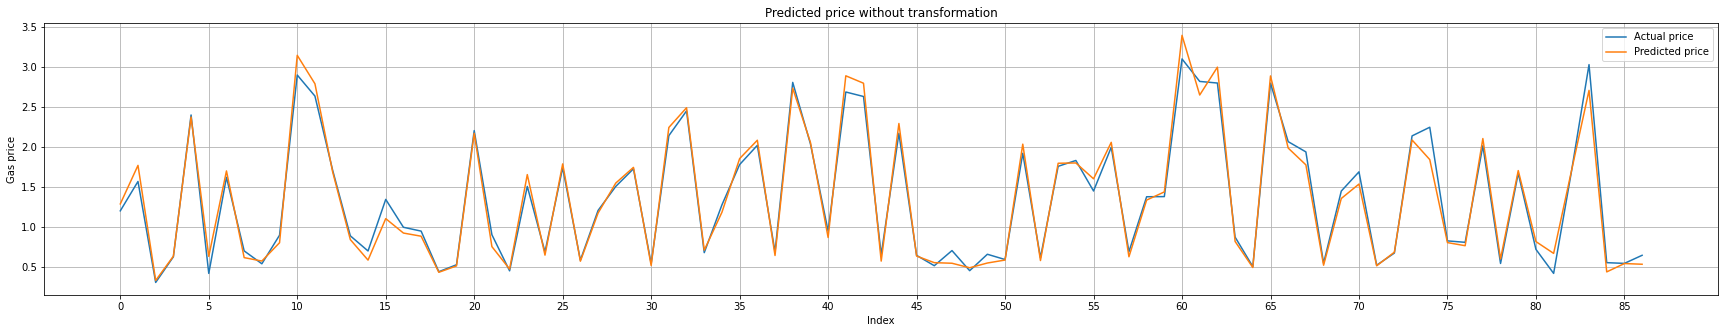

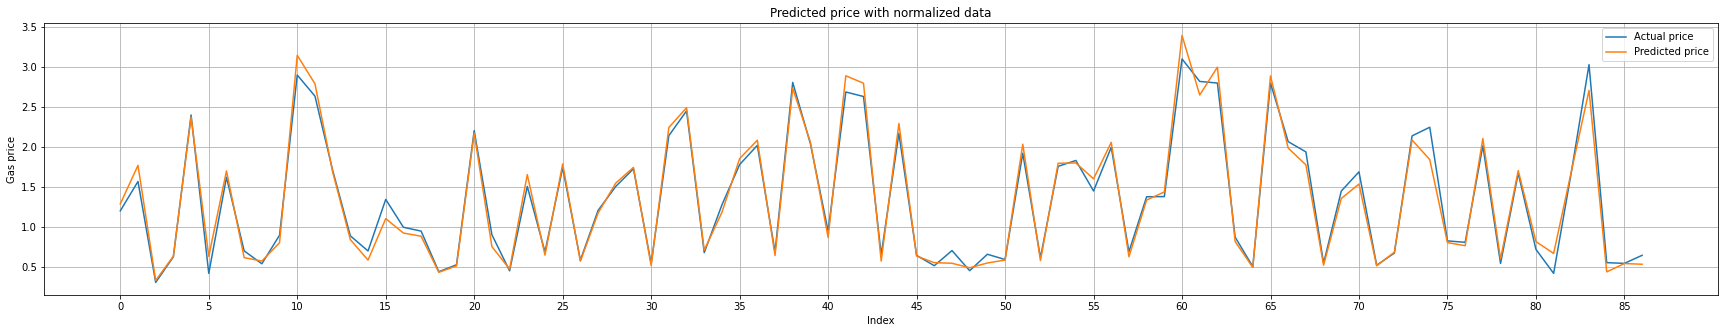

In [ ]:
tests = [ylr_te_pred,ylrnm_te_pred]
titles = ['Predicted price without transformation','Predicted price with normalized data']
filenames = ['Linear regression without transformation','Linear regression on normalized data']
for i,j,k,l in zip(tests,titles,['A','B'],filenames):
  ax = y_te.plot(figsize=(30,5))
  pd.DataFrame(i).plot(ax=ax,grid=True)
  plt.xlabel('Index')
  plt.xticks(np.arange(0,len(y_te)+1,5))
  plt.ylabel('Gas price')
  plt.legend(['Actual price','Predicted price'])
  plt.title(f'{j}')
  try:
    plt.savefig(f'Results/Model outcomes/1{k}.{l}.png')
  except:
    os.mkdir('Results/Model outcomes')
    plt.savefig(f'Results/Model outcomes/1{k}.{l}.png')
plt.show()